In [5]:
from ndslib.data import load_data
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300





In [ ]:
abide_data = load_data("abide2")
abide_data.shape
# abide_data.head()

In [8]:

features = abide_data.filter(like='fs')
# features.head()
phenotypes = abide_data.iloc[:, :6]  # first 6  columns of all
# samples are put in a dataframe called phenotypes
# phenotypes.head()

y = pd.to_numeric(phenotypes['group'])
y = y - 1

columns_to_select= ['fsArea_L_V3_ROI', 'fsArea_L_5mv_ROI', 'fsArea_L_p32pr_ROI',
       'fsArea_L_OFC_ROI', 'fsArea_L_52_ROI', 'fsArea_L_STSvp_ROI',
       'fsArea_L_TF_ROI', 'fsArea_L_PH_ROI', 'fsArea_L_PFop_ROI',
       'fsArea_L_s32_ROI', 'fsArea_L_LBelt_ROI', 'fsArea_R_MST_ROI',
       'fsArea_R_VIP_ROI', 'fsArea_R_p32_ROI', 'fsArea_R_8Ad_ROI',
       'fsArea_R_AVI_ROI', 'fsArea_R_PBelt_ROI', 'fsArea_R_TE2a_ROI',
       'fsVol_L_POS2_ROI', 'fsVol_L_IPS1_ROI', 'fsVol_L_FFC_ROI',
       'fsVol_L_v23ab_ROI', 'fsVol_L_PoI2_ROI', 'fsVol_L_FOP2_ROI',
       'fsVol_L_PFt_ROI', 'fsVol_L_AIP_ROI', 'fsVol_L_STGa_ROI',
       'fsVol_L_25_ROI', 'fsVol_L_s32_ROI', 'fsVol_R_POS2_ROI',
       'fsVol_R_MIP_ROI', 'fsVol_R_8BL_ROI', 'fsVol_R_9a_ROI',
       'fsVol_R_10pp_ROI', 'fsVol_R_LIPd_ROI', 'fsVol_R_OP2-3_ROI',
       'fsVol_R_Pir_ROI', 'fsVol_R_AVI_ROI', 'fsVol_R_TE1p_ROI',
       'fsVol_R_PHT_ROI', 'fsVol_R_TPOJ1_ROI', 'fsVol_R_PoI1_ROI',
       'fsVol_R_Ig_ROI', 'fsLGI_L_V3_ROI', 'fsLGI_L_3b_ROI', 'fsLGI_L_V3B_ROI',
       'fsLGI_L_5mv_ROI', 'fsLGI_L_a24_ROI', 'fsLGI_L_44_ROI',
       'fsLGI_L_OFC_ROI', 'fsLGI_L_OP4_ROI', 'fsLGI_L_AIP_ROI',
       'fsLGI_L_PFop_ROI', 'fsLGI_L_s32_ROI', 'fsLGI_L_STSva_ROI',
       'fsLGI_R_MST_ROI', 'fsLGI_R_V3B_ROI', 'fsLGI_R_p32_ROI',
       'fsLGI_R_8Ad_ROI', 'fsLGI_R_RI_ROI', 'fsLGI_R_AVI_ROI',
       'fsLGI_R_STGa_ROI', 'fsLGI_R_STSvp_ROI', 'fsLGI_R_TE2a_ROI',
       'fsLGI_R_FST_ROI', 'fsLGI_R_V3CD_ROI', 'fsLGI_R_LO3_ROI',
       'fsCT_L_SFL_ROI', 'fsCT_L_d23ab_ROI', 'fsCT_L_1_ROI', 'fsCT_L_47m_ROI',
       'fsCT_L_10d_ROI', 'fsCT_L_9-46d_ROI', 'fsCT_L_11l_ROI',
       'fsCT_L_LIPd_ROI', 'fsCT_L_6a_ROI', 'fsCT_L_PFcm_ROI', 'fsCT_L_AVI_ROI',
       'fsCT_L_FOP1_ROI', 'fsCT_L_IP0_ROI', 'fsCT_L_PF_ROI', 'fsCT_L_VMV3_ROI',
       'fsCT_L_31pd_ROI', 'fsCT_L_FOP5_ROI', 'fsCT_R_55b_ROI',
       'fsCT_R_PCV_ROI', 'fsCT_R_7PL_ROI', 'fsCT_R_LIPv_ROI', 'fsCT_R_a24_ROI',
       'fsCT_R_45_ROI', 'fsCT_R_IFSp_ROI', 'fsCT_R_a9-46v_ROI',
       'fsCT_R_47s_ROI', 'fsCT_R_LIPd_ROI', 'fsCT_R_52_ROI', 'fsCT_R_TA2_ROI',
       'fsCT_R_PHT_ROI', 'fsCT_R_25_ROI', 'fsCT_R_A4_ROI', 'fsCT_R_PI_ROI']
imp_features = features[columns_to_select].copy()
X = imp_features

X.head()



,fsArea_L_V3_ROI,fsArea_L_5mv_ROI,fsArea_L_p32pr_ROI,fsArea_L_OFC_ROI,fsArea_L_52_ROI,fsArea_L_STSvp_ROI,fsArea_L_TF_ROI,fsArea_L_PH_ROI,fsArea_L_PFop_ROI,fsArea_L_s32_ROI,...,fsCT_R_IFSp_ROI,fsCT_R_a9-46v_ROI,fsCT_R_47s_ROI,fsCT_R_LIPd_ROI,fsCT_R_52_ROI,fsCT_R_TA2_ROI,fsCT_R_PHT_ROI,fsCT_R_25_ROI,fsCT_R_A4_ROI,fsCT_R_PI_ROI
0,1451.0,378.0,270.0,691.0,184.0,572.0,828.0,661.0,376.0,171.0,...,2.662,2.739,2.817,2.150,2.322,3.115,3.557,3.278,3.202,2.629
1,1584.0,361.0,321.0,850.0,188.0,593.0,818.0,818.0,242.0,158.0,...,2.615,2.780,3.130,2.552,2.443,3.161,3.418,3.882,3.530,2.670
2,1816.0,421.0,385.0,865.0,199.0,847.0,1140.0,759.0,513.0,218.0,...,2.536,2.669,2.847,2.500,2.395,3.125,2.987,3.441,3.148,2.891
3,1893.0,424.0,383.0,787.0,208.0,546.0,1053.0,764.0,468.0,173.0,...,2.752,2.868,2.701,2.671,2.735,2.217,3.242,2.861,3.258,2.696
4,1307.0,342.0,308.0,505.0,209.0,644.0,706.0,796.0,295.0,144.0,...,2.430,2.346,2.803,2.445,3.180,3.283,3.101,3.346,3.430,3.111


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.582089552238806
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.46      0.50        91
         1.0       0.60      0.68      0.64       110

    accuracy                           0.58       201
   macro avg       0.58      0.57      0.57       201
weighted avg       0.58      0.58      0.58       201



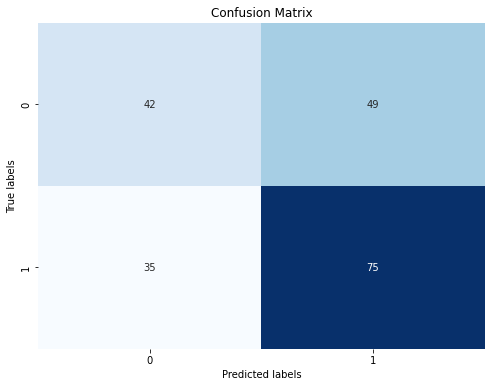

In [12]:
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
